### This script contains the following:
#### 1. Importing Libraries & Data
#### 2. Seperate df for each culture segment
#### 2. Exploring relationships
    2a. 

## 1. Importing Libraries & Data

In [380]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.ticker as mtick # maybe needs to be removed

In [381]:
# Project folder path

path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [382]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'dfall_4.csv'))

In [383]:
df.head()

,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range
0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,Mid Corruption
4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption


In [384]:
df.shape

(782, 19)

In [385]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)

In [386]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,Mid Corruption
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption


In [387]:
df.shape

(782, 18)

## 2. Regression Analysis
### GDP: a good indicator of Happiness

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GDP per capita', ylabel='Density'>

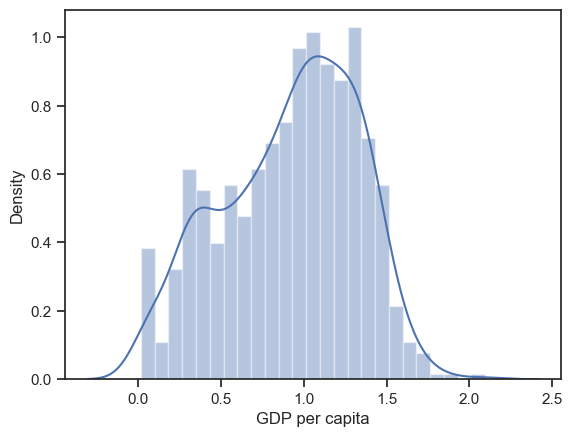

In [388]:
sns.distplot(df['GDP per capita'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [389]:
# Use describe method to calculate statistical values for 'GDP per capita'
results = df['GDP per capita'].describe()[['mean', '50%', 'max', 'min']]

# Display the results
print(results)

mean    0.916303
50%     0.982205
max     2.096000
min     0.015300
Name: GDP per capita, dtype: float64


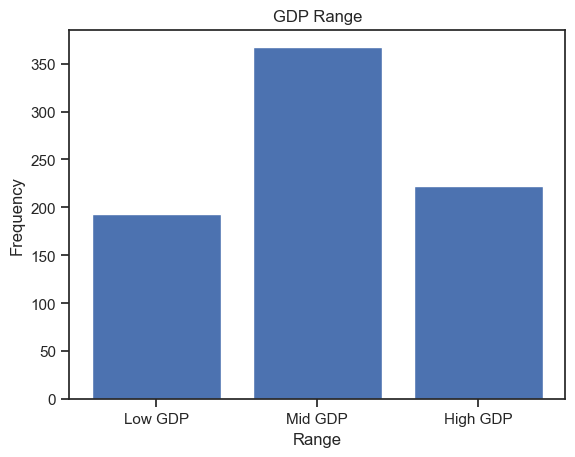

In [390]:
# Define the desired order of the labels
order = ['Low GDP', 'Mid GDP', 'High GDP']

# Get the unique values in the GDP-range column and their frequency counts
values, counts = df['GDP-range'].value_counts().sort_index().values, df['GDP-range'].value_counts().sort_index().index

# Create a dictionary to map the labels to their frequency counts
data_dict = dict(zip(counts, values))

# Sort the dictionary based on the order of the labels
sorted_dict = {k: data_dict[k] for k in order}

# Get the sorted values and labels
values_sorted = list(sorted_dict.values())
counts_sorted = list(sorted_dict.keys())

# Create a bar chart with the sorted values and labels
plt.bar(counts_sorted, values_sorted)

# Set the chart title and labels
plt.title('GDP Range')
plt.xlabel('Range')
plt.ylabel('Frequency')

# Show the chart
plt.show()

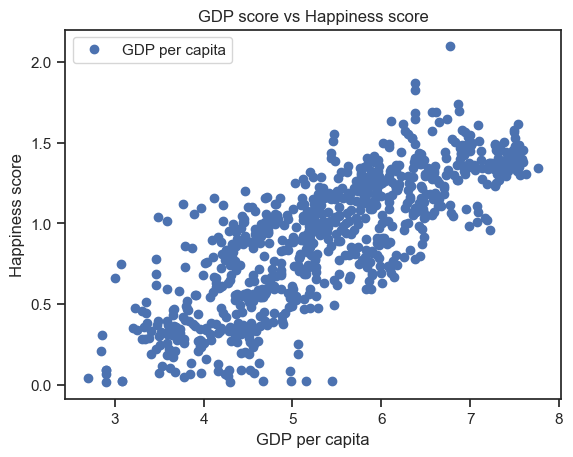

In [391]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Happiness score', y='GDP per capita',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('GDP score vs Happiness score')  
plt.xlabel('GDP per capita')  
plt.ylabel('Happiness score')    ## It looks like the higher the score for GDP per capita the higher the happiness score.
plt.show()

In [392]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['GDP per capita'].values.reshape(-1,1)  
y = df['Happiness score'].values.reshape(-1,1)  

In [393]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Regression Analysis

In [394]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [395]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [396]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

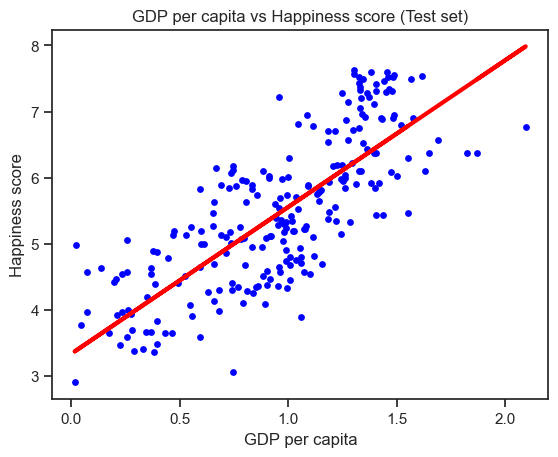

In [397]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Test set)')
plot_test.xlabel('GDP per capita')  # independent value
plot_test.ylabel('Happiness score')  # dependent value
plot_test.show()

In [398]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [399]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)     ## positive relationship. As X rises, so does y at a degree of 2.21678144
print('Mean squared error: ', rmse)   ## MSE of 0.52424... sounds reasonable considering the range of X values.
print('R2 score: ', r2)               ## R2 indicates that 59% of the time the model works. This seems moderate.

Slope: [[2.21678144]]
Mean squared error:  0.5242410295947518
R2 score:  0.5879182499385163


In [400]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.472,6.779676
1,6.778,5.811840
2,6.098,6.278059
3,7.054,6.294921
4,3.663,4.151294
5,4.574,5.477892
6,4.297,4.984582
7,4.982,3.390146
8,6.774,7.986326
9,5.430,6.454530


In [401]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [402]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [403]:
print('Slope:' ,regression.coef_)    ## about the same
print('Mean squared error: ', rmse)  ## a little bit better, relatively small differnce
print('R2 score: ', r2)              ## also a little bit better , relatively small differnce

Slope: [[2.21678144]]
Mean squared error:  0.4579472184201936
R2 score:  0.6371357901013417


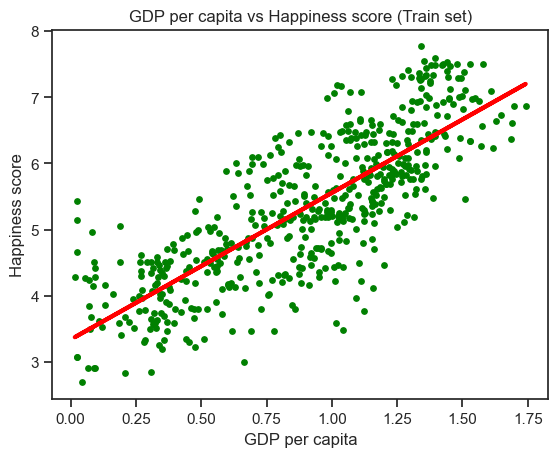

In [404]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP per capita vs Happiness score (Train set)')
plot_test.xlabel('GDP per capita')
plot_test.ylabel('Happiness score')
plot_test.show()

### The model is not a perfect fit, but we can conclude that eventhough it can't accuratly predict the happiness score it is a good indicator. Possibly a combination of factors will more accurately predict the happiness score. Next, I will find out who are the unhappiest regions and dig deeper in the composition of the factors.

## 3. Regions comparison

In [405]:
df.shape

(782, 18)

In [406]:
df['Region'].value_counts()

Sub-Saharan Africa                 196
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     103
Middle East and Northern Africa     98
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
Australia and New Zealand           10
North America                       10
Name: Region, dtype: int64

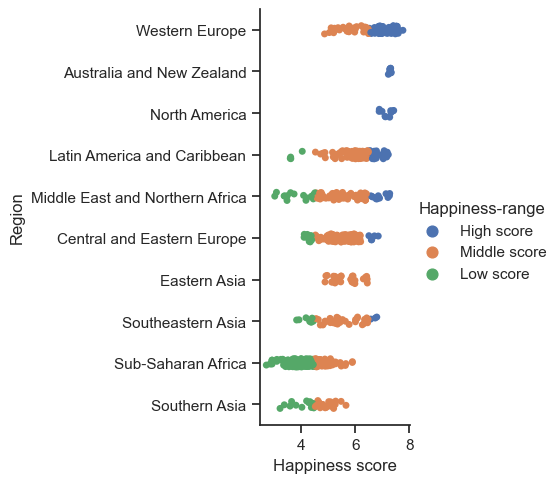

In [407]:
# Create a categorical plot "Happiness-range" & "Region"

sns.set(style='ticks')
g = sns.catplot(x='Happiness score', y='Region', hue='Happiness-range', data=df)

### Sub-Saharan is the unhappiest region.

In [408]:
unhappiest=df.loc[df['Happiness-range']== 'Low score']

In [409]:
unhappiest['Region'].value_counts()

Sub-Saharan Africa                 133
Middle East and Northern Africa     18
Southern Asia                       15
Central and Eastern Europe          14
Southeastern Asia                    8
Latin America and Caribbean          4
Name: Region, dtype: int64

In [410]:
unhappiest19=unhappiest.loc[unhappiest['Year']==2019]

In [411]:
unhappiest19.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range
121,2019,Mauritania,Sub-Saharan Africa,122,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Low score,Low GDP,Mid Social,Low Healthy,Low Freedom,Low Generosity,Low Corruption
122,2019,Mozambique,Sub-Saharan Africa,123,4.466,0.204,0.986,0.390,0.494,0.197,0.138,Low score,Low GDP,Low Social,Low Healthy,Mid Freedom,Mid Generosity,Mid Corruption
123,2019,Tunisia,Middle East and Northern Africa,124,4.461,0.921,1.000,0.815,0.167,0.059,0.055,Low score,Mid GDP,Mid Social,High Healthy,Low Freedom,Low Generosity,Low Corruption
124,2019,Bangladesh,Southern Asia,125,4.456,0.562,0.928,0.723,0.527,0.166,0.143,Low score,Low GDP,Low Social,Mid Healthy,High Freedom,Mid Generosity,Mid Corruption
125,2019,Iraq,Middle East and Northern Africa,126,4.437,1.043,0.980,0.574,0.241,0.148,0.089,Low score,Mid GDP,Low Social,Mid Healthy,Low Freedom,Low Generosity,Low Corruption


In [412]:
unhappiest19['Region'].value_counts(dropna=False)

Sub-Saharan Africa                 23
Middle East and Northern Africa     5
Southern Asia                       4
Southeastern Asia                   1
Central and Eastern Europe          1
Latin America and Caribbean         1
Name: Region, dtype: int64

In [413]:
df_2019 = df[df['Year'] == 2019]
df_2019['Region'].value_counts(dropna=False)

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        21
Western Europe                     20
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

#### A total of 36 countries had low happiness scores in 2019, with 23 of them being in Sub-Saharan Africa. This is more then half of total countries in this region. Middle East have 5 out of 20 (25%) and Southern Asia 4 out of 9 (almost 50%).

In [414]:
df.shape

(782, 18)

In [415]:
# Create new df with only factors to be analyzed

regions=df[['Region','Happiness score','GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [416]:
# Reduce df to the mean of the factors by region.

regions_mean = regions.groupby(['Region']).mean()

In [417]:
regions_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Australia and New Zealand to Western Europe
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Happiness score               10 non-null     float64
 1   GDP per capita                10 non-null     float64
 2   Social support                10 non-null     float64
 3   Healthy life expectancy       10 non-null     float64
 4   Freedom to make life choices  10 non-null     float64
 5   Generosity                    10 non-null     float64
 6   Perceptions of corruption     10 non-null     float64
dtypes: float64(7)
memory usage: 640.0+ bytes


In [418]:
# Reset the index

regions_mean=regions_mean.reset_index()

In [419]:
regions_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        10 non-null     object 
 1   Happiness score               10 non-null     float64
 2   GDP per capita                10 non-null     float64
 3   Social support                10 non-null     float64
 4   Healthy life expectancy       10 non-null     float64
 5   Freedom to make life choices  10 non-null     float64
 6   Generosity                    10 non-null     float64
 7   Perceptions of corruption     10 non-null     float64
dtypes: float64(7), object(1)
memory usage: 768.0+ bytes


In [420]:
regions_mean.head()

,Region,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Australia and New Zealand,7.294600,1.356197,1.424368,0.903074,0.611413,0.424441,0.357294
1,Central and Eastern Europe,5.427807,1.018488,1.172368,0.696532,0.352233,0.157000,0.075974
2,Eastern Asia,5.651567,1.237695,1.199232,0.862612,0.418185,0.199801,0.117992
3,Latin America and Caribbean,6.023811,0.941661,1.187033,0.676074,0.464330,0.185378,0.092432
4,Middle East and Northern Africa,5.346173,1.105559,0.998324,0.671890,0.353630,0.178408,0.146050


In [421]:
regions_mean.shape

(10, 8)

In [422]:
regions_mean['Region'].value_counts()

Australia and New Zealand          1
Central and Eastern Europe         1
Eastern Asia                       1
Latin America and Caribbean        1
Middle East and Northern Africa    1
North America                      1
Southeastern Asia                  1
Southern Asia                      1
Sub-Saharan Africa                 1
Western Europe                     1
Name: Region, dtype: int64

In [423]:
regions_mean = regions_mean.sort_values('Happiness score', ascending=False)

In [424]:
regions_mean

,Region,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Australia and New Zealand,7.294600,1.356197,1.424368,0.903074,0.611413,0.424441,0.357294
5,North America,7.174700,1.422037,1.357991,0.861086,0.558918,0.372339,0.223345
9,Western Europe,6.759311,1.372702,1.338851,0.892661,0.516868,0.271988,0.223788
3,Latin America and Caribbean,6.023811,0.941661,1.187033,0.676074,0.464330,0.185378,0.092432
2,Eastern Asia,5.651567,1.237695,1.199232,0.862612,0.418185,0.199801,0.117992
1,Central and Eastern Europe,5.427807,1.018488,1.172368,0.696532,0.352233,0.157000,0.075974
4,Middle East and Northern Africa,5.346173,1.105559,0.998324,0.671890,0.353630,0.178408,0.146050
6,Southeastern Asia,5.335227,0.893340,1.093673,0.635452,0.543723,0.384195,0.136213
7,Southern Asia,4.580657,0.638813,0.803835,0.513089,0.395598,0.300888,0.100357
8,Sub-Saharan Africa,4.190153,0.449145,0.847179,0.284663,0.354493,0.207592,0.105985


In [425]:
# Add rounded happiness score to Region for visualization

regions_mean['Region'] = regions_mean['Region'].replace({'Australia and New Zealand': 'Australia and New Zealand (7.3)',
                                                       'North America': 'North America (7.2)',
                                                       'Western Europe': 'Western Europe (6.8)',
                                                       'Latin America and Caribbean': 'Latin America and Caribbean (6.0)',
                                                       'Eastern Asia': 'Eastern Asia (5.7)',
                                                       'Central and Eastern Europe': 'Central and Eastern Europe (5.4)',
                                                       'Middle East and Northern Africa': 'Middle East and Northern Africa (5.3)',
                                                       'Southeastern Asia': 'Southeastern Asia (5.3)',
                                                       'Southern Asia': 'Southern Asia (4.6)',
                                                       'Sub-Saharan Africa': 'Sub-Saharan Africa (4.2)'})

In [426]:
regions_mean

,Region,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Australia and New Zealand (7.3),7.294600,1.356197,1.424368,0.903074,0.611413,0.424441,0.357294
5,North America (7.2),7.174700,1.422037,1.357991,0.861086,0.558918,0.372339,0.223345
9,Western Europe (6.8),6.759311,1.372702,1.338851,0.892661,0.516868,0.271988,0.223788
3,Latin America and Caribbean (6.0),6.023811,0.941661,1.187033,0.676074,0.464330,0.185378,0.092432
2,Eastern Asia (5.7),5.651567,1.237695,1.199232,0.862612,0.418185,0.199801,0.117992
1,Central and Eastern Europe (5.4),5.427807,1.018488,1.172368,0.696532,0.352233,0.157000,0.075974
4,Middle East and Northern Africa (5.3),5.346173,1.105559,0.998324,0.671890,0.353630,0.178408,0.146050
6,Southeastern Asia (5.3),5.335227,0.893340,1.093673,0.635452,0.543723,0.384195,0.136213
7,Southern Asia (4.6),4.580657,0.638813,0.803835,0.513089,0.395598,0.300888,0.100357
8,Sub-Saharan Africa (4.2),4.190153,0.449145,0.847179,0.284663,0.354493,0.207592,0.105985


In [427]:
regions_mean = regions_mean.drop('Happiness score', axis=1)

In [428]:
regions_mean.columns

Index(['Region', 'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

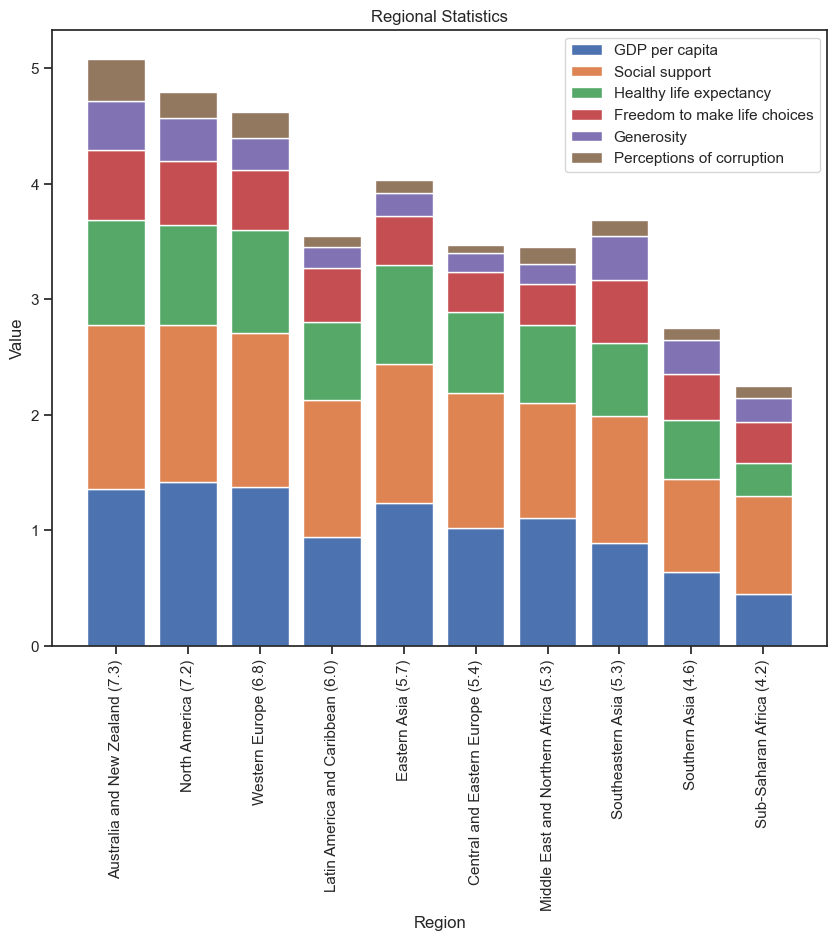

In [429]:
# Set the order of the regions
region_order = ['Australia and New Zealand (7.3)',
'North America (7.2)',
'Western Europe (6.8)',
'Latin America and Caribbean (6.0)',
'Eastern Asia (5.7)',
'Central and Eastern Europe (5.4)',
'Middle East and Northern Africa (5.3)',
'Southeastern Asia (5.3)',
'Southern Asia (4.6)',
'Sub-Saharan Africa (4.2)']


# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Sort the regions_mean DataFrame based on the region_order
sorted_regions_mean = regions_mean.set_index('Region').loc[region_order]


# Define the data to plot using the sorted regions_mean DataFrame
labels = sorted_regions_mean.index
gdp_data = sorted_regions_mean['GDP per capita']
social_data = sorted_regions_mean['Social support']
health_data = sorted_regions_mean['Healthy life expectancy']
freedom_data = sorted_regions_mean['Freedom to make life choices']
gen_data = sorted_regions_mean['Generosity']
corruption_data = sorted_regions_mean['Perceptions of corruption']

# Create the stacked bars
ax.bar(labels, gdp_data, label='GDP per capita')
ax.bar(labels, social_data, bottom=gdp_data, label='Social support')
ax.bar(labels, health_data, bottom=gdp_data+social_data, label='Healthy life expectancy')
ax.bar(labels, freedom_data, bottom=gdp_data+social_data+health_data, label='Freedom to make life choices')
ax.bar(labels, gen_data, bottom=gdp_data+social_data+health_data+freedom_data, label='Generosity')
ax.bar(labels, corruption_data, bottom=gdp_data+social_data+health_data+freedom_data+gen_data, label='Perceptions of corruption')

# Set the chart title and axis labels
ax.set_title('Regional Statistics')
ax.set_xlabel('Region')
ax.set_ylabel('Value')


# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [430]:
# New df with only rounded values for clarity

region_mean2=regions_mean[['Region','GDP per capita', 'Social support',
               'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
               'Perceptions of corruption']].round(2)


In [431]:
region_mean2

,Region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Australia and New Zealand (7.3),1.36,1.42,0.90,0.61,0.42,0.36
5,North America (7.2),1.42,1.36,0.86,0.56,0.37,0.22
9,Western Europe (6.8),1.37,1.34,0.89,0.52,0.27,0.22
3,Latin America and Caribbean (6.0),0.94,1.19,0.68,0.46,0.19,0.09
2,Eastern Asia (5.7),1.24,1.20,0.86,0.42,0.20,0.12
1,Central and Eastern Europe (5.4),1.02,1.17,0.70,0.35,0.16,0.08
4,Middle East and Northern Africa (5.3),1.11,1.00,0.67,0.35,0.18,0.15
6,Southeastern Asia (5.3),0.89,1.09,0.64,0.54,0.38,0.14
7,Southern Asia (4.6),0.64,0.80,0.51,0.40,0.30,0.10
8,Sub-Saharan Africa (4.2),0.45,0.85,0.28,0.35,0.21,0.11


In [433]:
df.columns

Index(['Year', 'Country', 'Region', 'Overall rank', 'Happiness score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Happiness-range', 'GDP-range',
       'Social-range', 'Healthy-range', 'Freedom-range', 'Generosity-range',
       'Corruption-range'],
      dtype='object')

In [434]:
df.shape

(782, 18)

In [435]:
# Create new df with Region and the factors 'ranges' variables (low, middle, high)

region_range = df[['Region', 'Happiness-range', 'GDP-range', 'Social-range', 'Healthy-range', 'Freedom-range', 'Generosity-range', 'Corruption-range']]

In [436]:
region_range_mode = region_range.groupby('Region').agg(lambda x: x.mode()[0])

In [437]:
region_range_mode

,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range
Region,,,,,,,
Australia and New Zealand,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption
Central and Eastern Europe,Middle score,Mid GDP,High Social,Mid Healthy,Mid Freedom,Low Generosity,Low Corruption
Eastern Asia,Middle score,High GDP,High Social,High Healthy,Mid Freedom,Mid Generosity,Low Corruption
Latin America and Caribbean,Middle score,Mid GDP,High Social,Mid Healthy,Mid Freedom,Mid Generosity,Low Corruption
Middle East and Northern Africa,Middle score,Mid GDP,Low Social,Mid Healthy,Low Freedom,Low Generosity,Mid Corruption
North America,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption
Southeastern Asia,Middle score,Mid GDP,High Social,Mid Healthy,High Freedom,High Generosity,Low Corruption
Southern Asia,Middle score,Mid GDP,Low Social,Mid Healthy,Mid Freedom,High Generosity,Low Corruption
Sub-Saharan Africa,Low score,Low GDP,Low Social,Low Healthy,Mid Freedom,Mid Generosity,Low Corruption


#### The 3 regions with high GDP scores are also the only 3 regions that scored Curruption high. This is probably with low expectations from their government in the remaining region, or just higher awareness of these issues in Western world. 

In [468]:
ct = pd.crosstab(df['Happiness-range'], df['GDP-range'])

print(ct)

GDP-range        High GDP  Low GDP  Mid GDP
Happiness-range                            
High score            112        0       21
Low score               0      127       65
Middle score          110       66      281


### Conclusion: 
    With high GDP the happiness score will be in the middle or high happiness range. 
    With mid GDP, there is a 82% chance that happiness score will be in the middle or high happiness range.
    With low GDP, there is a 66% chance that happiness score will be in the low happiness range.

## 4. Cluster Analysis  
 (clusters already created in part 1)
#### Finding Co-indicator 

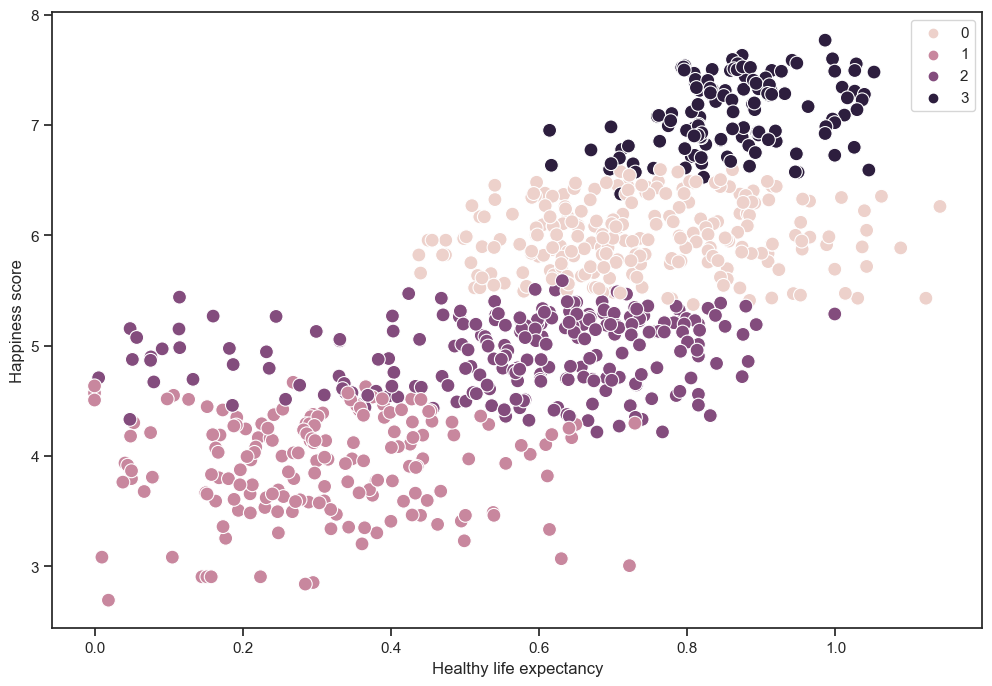

In [464]:
# Plot the clusters for the "Happiness score". NOTE: clusters already created in part 1.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Healthy life expectancy'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Healthy life expectancy') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

### Happiness scores of above 6 only occurs when Healthy life expectancy is above 0.4. Also happiness scores under 4 only occurs at Healtly life expectancy below 0.8.

In [469]:
ct = pd.crosstab(df['Happiness-range'], df['Healthy-range'])

print(ct)

Healthy-range    High Healthy  Low Healthy  Mid Healthy
Happiness-range                                        
High score                104            0           29
Low score                   2          152           38
Middle score               98           75          284


### Conlcusion:
    With high healthy scores, there is a 98% chance that happiness score will be in the high-range
    With mid healthy scores, there is a 89% chance that happiness score will be in the mid- or high-range
    With low healthy scores, there is a 67% chance that happiness score will be in the mid- or high-range and zero chance of having a happiness score in the high-range.

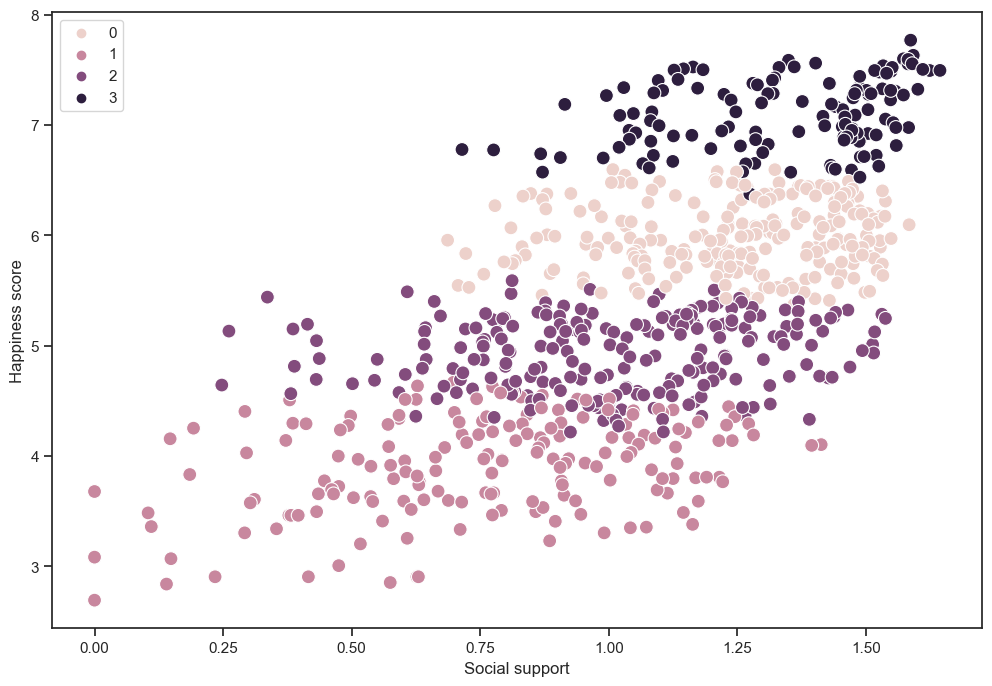

In [470]:
# Plot the clusters for the "Happiness score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social support'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Social support') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

### Happiness scores above 5.5 only occurs when Social scores is above 0.7. Low scores on the other does occur even when Social support is high, with less frequency though. 

In [471]:
ct = pd.crosstab(df['Happiness-range'], df['Social-range'])

print(ct)

Social-range     High Social  Low Social  Mid Social
Happiness-range                                     
High score                88           8          37
Low score                  9         134          49
Middle score             171         145         141


### Conlcusion:
    With high social scores, there is a 97% chance that happiness score will be in the mid- or high-range.
    With mid social scores, there is a 78% chance that happiness score will be in the mid- or high-range.
    With low healthy scores, there is a 97% chance that happiness score will be in the low-range.

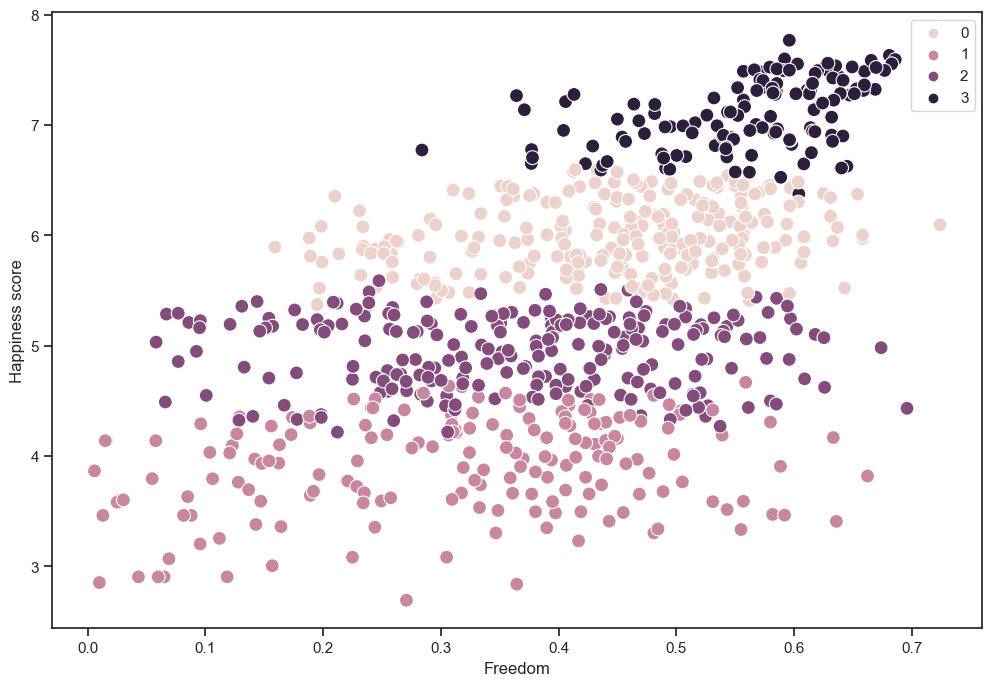

In [472]:
# Plot the clusters for the "Happiness score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Freedom to make life choices'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freedom') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

### Happiness scores above 5.75 only occurs when freedom is above 0.15. And happiness scores of 6.75 and higher only occurs when freedom scores are above 0.35. Below the 5.75 treshold there does not seem to be much limitations. 

In [474]:
ct = pd.crosstab(df['Happiness-range'], df['Freedom-range'])

print(ct)

Freedom-range    High Freedom  Low Freedom  Mid Freedom
Happiness-range                                        
High score                100            1           32
Low score                  24           77           91
Middle score              123          105          229


In [ ]:
### Conlcusion:
    With high social scores, there is a 97% chance that happiness score will be in the mid- or high-range.
    With mid social scores, there is a 78% chance that happiness score will be in the mid- or high-range.
    With low healthy scores, there is a 97% chance that happiness score will be in the low-range.

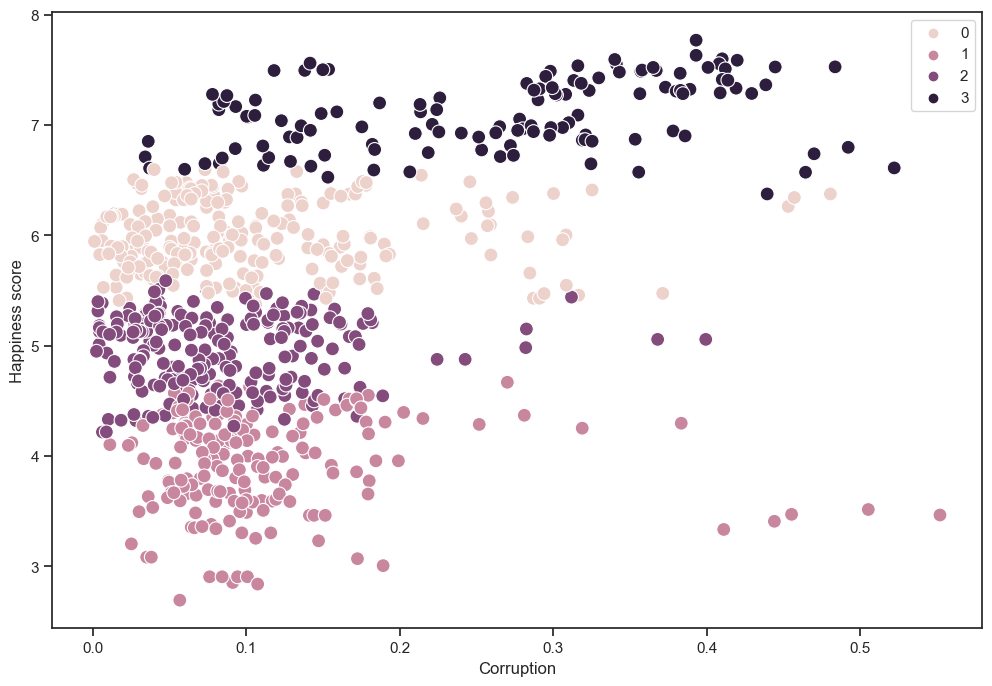

In [475]:
# Plot the clusters for the "Happiness score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Perceptions of corruption'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Corruption') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

### Ironically when corruption is high, is when the highest happiness scores occurs.  When corruption is low, the scores ranges from low- all the way up to the high-range.

In [476]:
ct = pd.crosstab(df['Happiness-range'], df['Corruption-range'])

print(ct)

Corruption-range  High Corruption  Low Corruption  Mid Corruption
Happiness-range                                                  
High score                     86              18              29
Low score                      11             120              61
Middle score                   35             287             135


### Conlcusion:
    With high corruption scores, there is a 92% chance that happiness score will be in the mid- or high-range.
    With mid corruption scores, there is a 85% chance that happiness score will be in the mid- or low-range.
    With low corruption scores, there is a 95% chance that happiness score will be in the mid- or low-range.
    -- There is not enough probability to gather from the corruption analysis to include it as an indicator.--